**Código feito por:** Franciane Rodrigues

**Disciplina:** Fundamentos de Estatística - 1

**Professor:** Prof. Dr. Wilson Tarantin Jr.

**Aula ministrada em:** 19 de abril de 2021

**Curso:** MBA em Data Science e Analytics 

**Instituição:** Pecege - USP/Esalq

**Referência:** FÁVERO, L. P. L.; BELFIORE, P. P. Manual de análise de dados: estatística e modelagem multivariada com Excel, SPSS e Stata. Rio de Janeiro: Elsevier, 2021.
 

# **ESTATÍSTÍCA DESCRITIVA UNIVARIADA** 

## **1. Usando o Google Colab**

In [ ]:
# Comando de abertura para Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **2. Tabela de Frequências para uma variável Qualitativa**

In [ ]:
# Abertura de bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

**Exemplo 1:** Foram coletados dados sobre o país de origem de 300 pessoas que estavam em uma palestra. 

Vamos construir uma tabela de frequências contendo os seguintes tipos de frequência:

*   Frequência Absoluta;
*   Frequência absoluta Acumulada;
*   Frequência Relativa;
*   Frequencia Relativa Acumulada;

In [ ]:
# Abertura e organização dos dados
dataset1 = pd.read_csv('/content/drive/MyDrive/MBA USP Esalq/Fundamentos de Estatística 1/Dados1.txt', sep='\t')

# Aparecendo as cinco primeiras posições do Dataset (ou banco de dados)
dataset1.head()

,Indivíduo,País de Origem
0,1,Brasil
1,2,Inglaterra
2,3,Japão
3,4,EUA
4,5,Brasil


In [ ]:
# Primeiro vamos somar quantos individuos tem em cada país
tabela_freq1 = pd.DataFrame(dataset1['País de Origem'].value_counts(ascending=False).reset_index())

# Renomear as colunas
tabela_freq1 = tabela_freq1.rename({'País de Origem': 'Frequência Absoluta'}, axis = 1)
tabela_freq1 = tabela_freq1.rename({'index': 'País'}, axis = 1)

# Calculando a Frequência Absoluta Acumulada
tabela_freq1["Frequência Absoluta Acumulada"] = tabela_freq1["Frequência Absoluta"].cumsum()

# Calculando a Frequência Relativa
tabela_freq1['Frequência Relativa'] = round(((tabela_freq1['Frequência Absoluta']/300.)*100), 1)

# Calculando a Frequência Relativa Acumulada
tabela_freq1["Frequência Relativa Acumulada"] = round(tabela_freq1["Frequência Absoluta"].cumsum()/tabela_freq1["Frequência Absoluta"].sum()*100, 1)

# Aparecendo a tabela
display(tabela_freq1)

,País,Frequência Absoluta,Frequência Absoluta Acumulada,Frequência Relativa,Frequência Relativa Acumulada
0,Brasil,59,59,19.7,19.7
1,EUA,35,94,11.7,31.3
2,Índia,19,113,6.3,37.7
3,China,18,131,6.0,43.7
4,Uruguai,17,148,5.7,49.3
5,Japão,16,164,5.3,54.7
6,Austrália,15,179,5.0,59.7
7,África do Sul,14,193,4.7,64.3
8,Rússia,14,207,4.7,69.0
9,Inglaterra,12,219,4.0,73.0


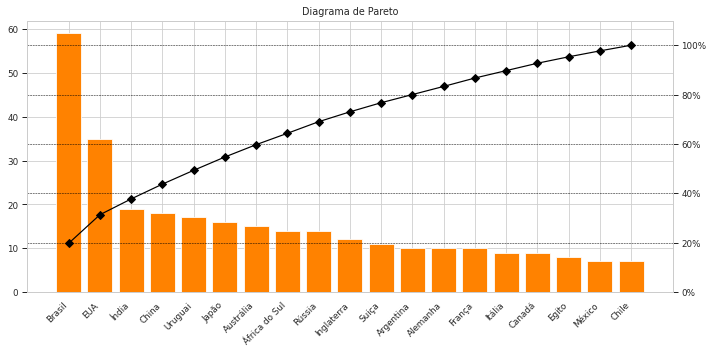

In [ ]:
# Plotando um Diagrama de Pareto utilizando Frequência Absoluta e Frequência Relativa Acumulada da tabela

# Linha de código que permite fazer vários gráficos em uma figura e posteriormente a definição de tamanho
fig, ax = plt.subplots(figsize=(10,5))

# Comando para o gráfico de barra para Frequência Absoluta
ax.bar(tabela_freq1.País, tabela_freq1["Frequência Absoluta"], color="#FF8200")

#Criação de um eixo duplo compartilhando o eixo x
ax2 = ax.twinx()

# Criando o gráfico de linha para Frequência Relativa Acumulada
ax2.plot(tabela_freq1.País, tabela_freq1["Frequência Relativa Acumulada"], color="#000000", marker="D", ms=5)
ax2.yaxis.set_major_formatter(PercentFormatter())

# Valor mínimo e máximo do eico secundário
ax2.set_ylim([0,110])

# Linha de marcação do eixo de porcentagem
plt.grid(color='black', linestyle='--', linewidth=0.5)

# Título, rotação de eixo e ajuste gráfico
plt.title('Diagrama de Pareto')
fig.autofmt_xdate(rotation=45)
plt.tight_layout()

# Mostrar Gráfico
plt.show()

Obs.: Conforme Fávero e Belfiore (2021), os gráficos recomendados para uma variável qualitativa são:

1.   Barras
1.   Setores
2.   Diagrama de Pareto


## **3. Tabela de Frequências para uma variável Quantitativa**

**Exemplo 2:** Na análise de concessão de empréstimos, uma variável potencialmente importante é a renda da pessoa. O gerente de um banco coleta uma base de dados de seus correntistas e extrai a variável “renda mensal (R$)” para 50 pessoas. Embora se trate de uma variável quantitativa, deseja realizar uma análise por meio de tabela de frequências. 

Neste sentido, pede-se:

**a)** Classifique os correntistas em faixas de renda, sendo: 0-2.000; 2.001-4.000; 4.001-6.000; 6.001-8.000; 8.001-10.000 e 10.001-12.000.

**b)** Em seguida, elabore a tabela de frequências para as faixas de renda acima.

In [ ]:
# Abertura de bibliotecas
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Abertura e organização dos dados
dataset2 = pd.read_csv('/content/drive/MyDrive/MBA USP Esalq/Fundamentos de Estatística 1/Dados2.txt', sep='\t')
dataset2 = dataset2.rename({'Renda (R$)': 'Renda'}, axis = 1)
dataset2.head()

,Observação,Renda
0,1,"2.893,70"
1,2,"3.448,38"
2,3,"1.460,81"
3,4,"2.223,70"
4,5,"2.500,70"


In [ ]:
# Avaliação do tipo das variáveis
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Observação  50 non-null     int64 
 1   Renda       50 non-null     object
dtypes: int64(1), object(1)
memory usage: 928.0+ bytes


In [ ]:
# Função para conversão de valor monetário string para float
# Observação: uma vez lido essa célula, desligue-a!
dataset2['Renda'] = dataset2['Renda'].apply(lambda x: float(x.replace(".","").replace(",",".")))

In [ ]:
# Conferência de conversão
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Observação  50 non-null     int64  
 1   Renda       50 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 928.0 bytes


In [ ]:
# Medidas-resumo da base de dados
dataset2.describe()

,Observação,Renda
count,50.00000,50.000000
mean,25.50000,4324.996000
std,14.57738,2525.175774
min,1.00000,1100.250000
25%,13.25000,2566.825000
50%,25.50000,3710.100000
75%,37.75000,5548.140000
max,50.00000,11320.000000


In [ ]:
# Preparando para agrupamento de dados - Dados se encontram na medida-resumo
# Inicialmente, calcula-se a amplitude pela fórmulá: A = Valor máximo – Valor mínimo da amostra
# Utilizando a variável Renda
A = 11320 - 1100.25

# Determinação do número de Classes a partir do tamanho da amostra
k = math.sqrt(50.)

# Calcule o intervalo de classes
h = A/k

# Imprima na tela
print(A, round(k,2), round(h))

10219.75 7.07 1445


In [ ]:
# Primeiro vamos somar a frequência em cada intervalo de classe
tabela_freq2 = pd.DataFrame(dataset2["Renda"].value_counts(bins=7, ascending=False).reset_index())

# Renomear as colunas
tabela_freq2 = tabela_freq2.rename({'index': 'Intervalo'}, axis = 1)
tabela_freq2 = tabela_freq2.rename({'Renda': 'Frequência Absoluta'}, axis = 1)

# Calculando a Frequência Absoluta Acumulada
tabela_freq2["Frequência Absoluta Acumulada"] = tabela_freq2["Frequência Absoluta"].cumsum()

# Calculando a Frequência Relativa
tabela_freq2['Frequência Relativa'] = round(((tabela_freq2['Frequência Absoluta']/50.)*100), 1)

# Calculando a Frequência Relativa Acumulada
tabela_freq2["Frequência Relativa Acumulada"] = round(tabela_freq2["Frequência Absoluta"].cumsum()/tabela_freq2["Frequência Absoluta"].sum()*100, 1)

# Aparecendo a tabela
display(tabela_freq2)

,Intervalo,Frequência Absoluta,Frequência Absoluta Acumulada,Frequência Relativa,Frequência Relativa Acumulada
0,"(2560.214, 4020.179]",15,15,30.0,30.0
1,"(1090.029, 2560.214]",13,28,26.0,56.0
2,"(4020.179, 5480.143]",8,36,16.0,72.0
3,"(5480.143, 6940.107]",6,42,12.0,84.0
4,"(8400.071, 9860.036]",4,46,8.0,92.0
5,"(6940.107, 8400.071]",2,48,4.0,96.0
6,"(9860.036, 11320.0]",2,50,4.0,100.0


Obs. Fizemos a tabela de frequência em classes para aprender como fazer, porém ao fazer um histograma de frequência será necessário o dataset original neste caso "dataset2". 

De acordo com Fávero e Belfiore (2021) um histograma é um gráfico de barras vertical que representa uma distribuição de frequência uma variável quantitativa discreta ou continua.

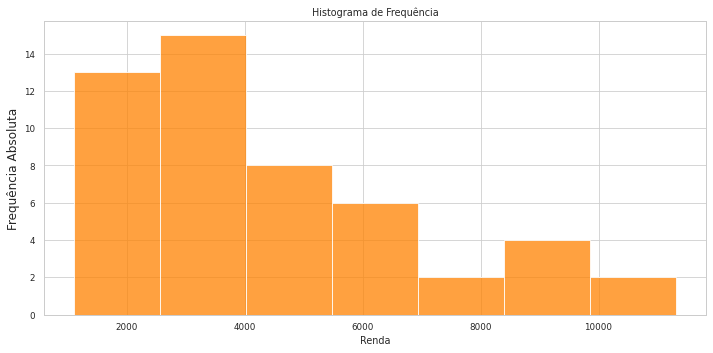

In [ ]:
# Vamos usar o pacote seaborn para fazer um gráfico mais bonito

# Tamanho da figura
fig = plt.subplots(figsize=(10,5))

# Tipo do gráfico e customização
# Atenção: aqui estamos usando o dataset2. 
sns.histplot(data=dataset2, x="Renda", color='#FF8200')
sns.set(style='whitegrid', context='paper')
plt.title('Histograma de Frequência')
plt.ylabel("Frequência Absoluta", fontsize=12)

# Ajustar o gráfico
plt.tight_layout()

# Mostrar Gráfico
plt.show()

## **4. Medidas de Posição, Dispersão e Forma**

In [ ]:
# Instalando o pacote Plotly para gráficos interativos
!pip install plotly

In [ ]:
# Abertura de bibliotecas
import pandas as pd
import plotly.express as px
import math

**Exemplo 3:** Um consumidor está analisando o preço de um produto que deseja comprar. Para gerar mais informação para sua tomada de decisão, ele coleta 100 preços praticados para o produto. Como o "preço" é uma variável quantitativa, serão realizadas as análises por meio das medidas de posição, dispersão e forma. 

In [ ]:
# Abertura e organização dos dados
dataset3 = pd.read_csv('/content/drive/MyDrive/MBA USP Esalq/Fundamentos de Estatística 1/Dados3.txt', sep='\t')
dataset3 = dataset3.rename({'Preço ($)': 'Preço'}, axis = 1)
dataset3.head()

,Nº Observação,Preço
0,1,"189,00"
1,2,"195,00"
2,3,"199,00"
3,4,"189,00"
4,5,"197,00"


In [ ]:
# Função para conversão de valor monetário string para float
# Observação: uma vez lido essa célula, desligue-a!
dataset3['Preço'] = dataset3['Preço'].apply(lambda x: float(x.replace(",",".")))

In [ ]:
# Verificação de conversão
dataset3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Nº Observação  100 non-null    int64  
 1   Preço          100 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


**4.1 Medidas de posição**

In [ ]:
# Número de observações ou tamanho da amostra
dataset3.count()

Nº Observação    100
Preço            100
dtype: int64

In [ ]:
# Medidas de Tendência Central
media = dataset3['Preço'].mean()
mediana = dataset3['Preço'].median()
moda = dataset3['Preço'].mode() # Moda é a única medida que pode ser aplicada a dados qualitativos

# Imprima valores em tela
print('Média é: ', media)
print('Mediana é ', mediana)
print('Moda é ', moda[0])

Média é:  190.77
Mediana é  189.0
Moda é  199.0


In [ ]:
# Separatrizes - Quartis
Q1 = dataset3['Preço'].quantile(0.25)
Q2 = dataset3['Preço'].quantile(0.5)
Q3 = dataset3['Preço'].quantile(0.75)

# Imprima valores em tela
print('Primeiro quartil: ', Q1)
print('Segundo quartil (Mediana): ', Q2)
print('Terceiro quartil: ', Q3)

Primeiro quartil:  179.0
Segundo quartil (Mediana):  189.0
Terceiro quartil:  199.0


In [ ]:
# Separatrizes - Decil
d2 = dataset3['Preço'].quantile(0.2)
d6 = dataset3['Preço'].quantile(0.6)

# Imprima valores em tela
print('2° decil é: ', d2)
print('6° decil é: ', d6)

2° decil é:  179.0
6° decil é:  196.4


In [ ]:
# Separatrizes - Percentil
p44 = dataset3['Preço'].quantile(0.44)
p85 = dataset3['Preço'].quantile(0.85)

# Imprima valores em tela
print('44° Percentil é: ', p44)
print('85° Percentil é: ', p85)

44° Percentil é:  189.0
85° Percentil é:  205.0


**4.2 Medidas de dispersão ou variabilidade** 

In [ ]:
# Valor mínimo e máximo
minimo = dataset3['Preço'].min()
maximo = dataset3['Preço'].max()

# Imprima valores em tela
print('Valor mínimo é: ', minimo)
print('Valor máximo é: ', maximo)

Valor mínimo é:  149.0
Valor máximo é:  239.0


In [ ]:
# Amplitude
A = maximo - minimo

# Imprima valores em tela
print('Amplitude é: ', A)

Amplitude é:  90.0


In [ ]:
# Variância: mostra a dispersão das observações de uma variável em torno da média
variancia = dataset3['Preço'].var() 

# Imprima valores em tela
print("Variância é: ", round(variancia,2))

Variância é:  244.02


In [ ]:
# Desvio-padrão: quanto maior esse valor, maior a dispersão em torno da média. 
desvio_padrão = dataset3['Preço'].std() 

# Imprima valores em tela
print("Desvio-padrão é: ", round(desvio_padrão,2))

Desvio-padrão é:  15.62


In [ ]:
# Erro-padrão: É o desvio padrão da média da variável. Quanto maior o tamanho da amostra, menor o erro-padrão.
# Portanto, mais precisa é a média estimada.
Sx = desvio_padrão/ math.sqrt(100.)

# Imprima valores em tela
print('O Erro-padrão é: ', round(Sx,2))

O Erro-padrão é:  1.56


In [ ]:
# Coeficiente de variação: medida de dispersão relativa. Quanto menor CV, mais homogeneo são os valores da variável e mais concentrados em torno da média.
# Pode ser utilizada para fazer comparações entre amostras, por exemplo.
CV = (desvio_padrão/media)*100

# Imprima valores em tela
print('O Coeficiente de variação é: ', round(CV,2), '%')

O Coeficiente de variação é:  8.19 %


**4.3 Medidas de forma** 

In [ ]:
# Coeficiente de Assimetria de Fisher: local de concentração da distribuição
# Mostra qual local da distribuição de frequências está mais concentrada as observações

assimetria = dataset3['Preço'].skew()

# Imprima valores em tela
print('O valor da assimetria é: ', round(assimetria,2))

O valor da assimetria é:  0.09


Como interpretar a assimetria?

*   g1 = 0 - indica curva simétrica
*   g1 > 0 - indica curva assimétrica positiva (à direita)
*   g1 < 0 - indica curva assimétrica negativa (à esquerda)

In [ ]:
# Coeficiente de Curtose de Fisher: achatamento da curva de distribuição comparando com a curva normal como referência
curtose = dataset3['Preço'].kurtosis()

# Imprima valores em tela
print('O valor da curtose é: ', round(curtose,2))

O valor da curtose é:  0.67


Como interpretar a curtose?

*   g2 = 0 - indica curva com distribuição normal 
*   g2 > 0 - indica curva com distribuição alongada (pico elevado)
*   g2 < 0 - indica curva com distribuição achatada (pico mais baixo)

In [ ]:
# Os principais resumos estatísticos podemos usar a seguinte linha de código
# Não é necessário colocar em uma variável, isso é opcional.
resumo_estatistico = dataset3.describe()

# Imprima na tela e o comando "display" é para colocar os dados em uma tabela
display(resumo_estatistico) 

,Nº Observação,Preço
count,100.000000,100.000000
mean,50.500000,190.770000
std,29.011492,15.621052
min,1.000000,149.000000
25%,25.750000,179.000000
50%,50.500000,189.000000
75%,75.250000,199.000000
max,100.000000,239.000000


#**5. Gráficos interativos usando Plotly** 

Será feito os gráficos: Histograma, boxplot, dispersão e linha.

In [ ]:
# Fazendo um histograma de frequência interativo
fig = px.histogram(dataset3, 
                   x="Preço", 
                   nbins=10, 
                   color_discrete_sequence = ['orangered'],
                   title="Histograma de Frequência em Classes: Preço")

fig.update_layout(yaxis_title="Contagem")
fig.update_layout(width=800, height=500) 

# Mostra gráfico
fig.show()

# Para mais informações, acesse: https://plotly.com/python/histograms/
# Para paleta de cores, acesse: https://www.biomooc.com/color/seabornColors.html

In [ ]:
# Boxplot referente a variável preço
# Caso queira o gráfico na horizontal, troque "y="Preço" por "x="Preço""
fig = px.box(dataset3, 
             y="Preço", 
             points="all", 
             title="Boxplot: Preço",
             color_discrete_sequence = ['orangered'])


fig.update_layout(width=800, height=500) 
fig.show()

In [ ]:
# Grafico de dispersão 
fig = px.scatter(dataset3, 
                 x="Nº Observação", 
                 y='Preço',
                 title="Gráfico de Dispersão: Preço",
                 color ='Preço',
                 range_color=[140,240]
                 )

# Tamanho e mostrar gráfico 
fig.update_layout(width=800, height=500) 
fig.show()

In [ ]:
# Para gráfico de linha
fig = px.line(dataset3, 
              x="Nº Observação", 
              y='Preço',
              title="Gráfico de Linha: Preço",
              )
fig.update_traces(line_color='orangered', line_width=1)

# Tamanho e mostrar gráfico 
fig.update_layout(width=800, height=500) 
fig.show()